# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Extracting Dataset

In [ ]:
!unzip /content/drive/MyDrive/Datasets/malnutrition_dataset.zip -d /content/drive/MyDrive/Datasets

Archive:  /content/drive/MyDrive/Datasets/malnutrition_dataset.zip
   creating: /content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/
   creating: /content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/
  inflating: /content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (1).jpg  
  inflating: /content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (10).jpg  
  inflating: /content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (11).jpg  
  inflating: /content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (12).jpg  
  inflating: /content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (13).jpg  
  inflating: /content/drive/MyDrive/Datasets/malnutrition_datase

# Dry Skin Dataset CNN Model

# Storing the path of the Dry Skin dataset in a variable

In [ ]:
dataset_dir = "/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency"

# Imports

In [ ]:
import pathlib
dataset_dir = pathlib.Path(dataset_dir)

In [ ]:
dataset_dir

PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency')

In [ ]:
list(dataset_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (83).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (96).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (85).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (82).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (88).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (95).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (94).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b

In [ ]:
image_count = len(list(dataset_dir.glob('*/*.jpg')))

In [ ]:
print(image_count)

92


In [ ]:
dry_skin = len(list(dataset_dir.glob('dry_skin/*')))

In [ ]:
dry_skin

92

In [ ]:
healthy_skin = len(list(dataset_dir.glob('healthy_skin/*')))

In [ ]:
healthy_skin

71

In [ ]:
dry_skin_img_list = list(dataset_dir.glob('dry_skin/*'))

In [ ]:
dry_skin_img_list[:10]

[PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (83).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (96).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (85).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (82).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (88).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (95).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/dry_skin/dry_skin (94).jpg'),
 PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b

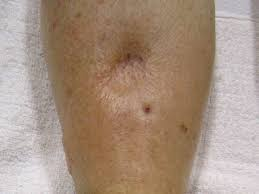

In [ ]:
PIL.Image.open(str(dry_skin_img_list[0]))

In [ ]:
healthy_skin_img_list = list(dataset_dir.glob('healthy_skin/*'))

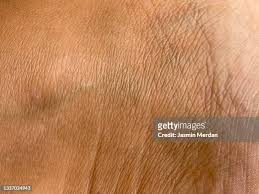

In [ ]:
PIL.Image.open(str(healthy_skin_img_list[10]))

In [ ]:
dry_skin_vitamin_b7_iron_deficiency_paths_dict = {
    "healthy_skin" : list(dataset_dir.glob('healthy_skin/*')),
    "dry_skin" : list(dataset_dir.glob('dry_skin/*')),
}

In [ ]:
dry_skin_vitamin_b7_iron_deficiency_labels_dict = {
    'healthy_skin' : 0,
    'dry_skin' : 1
}

In [ ]:
dry_skin_vitamin_b7_iron_deficiency_paths_dict['healthy_skin'][10]

PosixPath('/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/healthy_skin/healthy_skin (28).jpeg')

In [ ]:
str(dry_skin_vitamin_b7_iron_deficiency_paths_dict['healthy_skin'][10])

'/content/drive/MyDrive/Datasets/malnutrition_dataset/dry_skin_vitamin_b7_iron_deficiency/healthy_skin/healthy_skin (28).jpeg'

In [ ]:
healthy_skin_img = cv2.imread(str(dry_skin_vitamin_b7_iron_deficiency_paths_dict['healthy_skin'][10]))
healthy_skin_img

array([[[ 30,  84, 145],
        [ 37,  91, 152],
        [ 32,  86, 147],
        ...,
        [170, 205, 249],
        [170, 205, 249],
        [170, 205, 249]],

       [[ 33,  87, 148],
        [ 39,  93, 154],
        [ 34,  88, 149],
        ...,
        [172, 205, 250],
        [171, 206, 249],
        [172, 205, 250]],

       [[ 37,  91, 152],
        [ 44,  98, 159],
        [ 39,  93, 154],
        ...,
        [173, 207, 250],
        [173, 208, 248],
        [175, 207, 250]],

       ...,

       [[ 88, 114, 168],
        [ 79, 106, 157],
        [ 86, 112, 166],
        ...,
        [118, 147, 204],
        [119, 148, 205],
        [119, 146, 203]],

       [[ 69, 110, 172],
        [ 64, 106, 165],
        [ 75, 116, 178],
        ...,
        [111, 138, 195],
        [107, 134, 190],
        [132, 157, 213]],

       [[ 62, 110, 174],
        [ 57, 105, 169],
        [ 68, 116, 180],
        ...,
        [113, 137, 195],
        [109, 134, 190],
        [132, 157, 213]]

In [ ]:
print(healthy_skin_img.shape)

(194, 259, 3)


In [ ]:
cv2.resize(healthy_skin_img, (180, 180)).shape

(180, 180, 3)

In [ ]:
for skin_category, images_path in dry_skin_vitamin_b7_iron_deficiency_paths_dict.items():
    print(skin_category)
    print(len(images_path))

healthy_skin
71
dry_skin
92


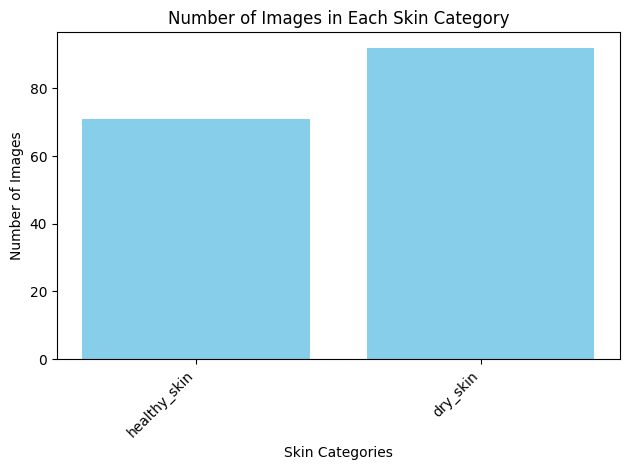

In [ ]:
import matplotlib.pyplot as plt

skin_categories = ['healthy_skin', 'dry_skin']
image_counts = [71, 92]

# Plotting the bar chart
plt.bar(skin_categories, image_counts, color='skyblue')
plt.xlabel('Skin Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Skin Category')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()

# Showing the plot
plt.show()

In [ ]:
X, y = [], []

for skin_category, images_path in dry_skin_vitamin_b7_iron_deficiency_paths_dict.items():
    for image_path in images_path:
        img = cv2.imread(str(image_path))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(dry_skin_vitamin_b7_iron_deficiency_labels_dict[skin_category])

In [ ]:
X = np.array(X)
y = np.array(y)

# Splitting the dataset (80 % - Train, 20 % - Test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
len(X_train)

130

In [ ]:
len(X_test)

33

In [ ]:
X_train[1]

array([[[131, 131, 131],
        [123, 123, 123],
        [110, 110, 110],
        ...,
        [131, 131, 131],
        [129, 129, 129],
        [128, 128, 128]],

       [[126, 126, 126],
        [119, 119, 119],
        [108, 108, 108],
        ...,
        [126, 126, 126],
        [123, 123, 123],
        [122, 122, 122]],

       [[118, 118, 118],
        [113, 113, 113],
        [104, 104, 104],
        ...,
        [119, 119, 119],
        [114, 114, 114],
        [111, 111, 111]],

       ...,

       [[129, 129, 129],
        [131, 131, 131],
        [135, 135, 135],
        ...,
        [129, 129, 129],
        [125, 125, 125],
        [122, 122, 122]],

       [[128, 128, 128],
        [130, 130, 130],
        [133, 133, 133],
        ...,
        [128, 128, 128],
        [124, 124, 124],
        [122, 122, 122]],

       [[128, 128, 128],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [128, 128, 128],
        [124, 124, 124],
        [122, 122, 122]]

# Scaling the numpy arrays representing the images in the training & testing dataset (Just divide X_train & X_test by 255, after that all the values that you would have in the arrays would be between 0 to 1 & not 0 to 255 as they were before scaling)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled[1].shape

(180, 180, 3)

In [ ]:
X_test_scaled[1].shape

(180, 180, 3)

# if num_classes = 2, in the last dense layer which is responsible for the output of the predicted class that we get, there would be only 2 labels which would be 0, 1 & not 1, 2. It always starts from 0 & not 1. If the num_classes is 2, it would start from 0 & would end at 1 & not 2

# Training the CNN Model

In [ ]:
num_classes = 2

model = Sequential([
  # usually we put multiple convolutional & maxpooling layers first
  layers.Conv2D(16, 3, padding='same', activation='relu'), # 16 filters of size 3*3, the activation function we use usually is relu
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), # 32 filters of size 3*3
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), # 64 filters of size 3*3
  layers.MaxPooling2D(),
  # till this point we will have a 2D array
  # Before the dense layer we should always flatten the input that would go into the Dense layer
  layers.Flatten(), # converts the 2D array into 1D array
  # We always put a dense layer after adding all the convolutional layers
  # The dense layer only accepts a 1D array
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) # there would be 2 neurons in the last layer so if the first neuron is activated we would know that the predicted class is 'healthy_skin' & similarly the activation of the other neuron would indicate the class being 'dry_skin'
  # the number of neurons in the last layer which is a dense layer is always equal to the number of classes & the activation of different neurons from the last layer indicate different classes for the input provided
  # activation function being used here is linear, we can even use some other function
  # We can use the softmax function as the activation function for this last Dense layer which gives the predictions / outputs
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # SparseCategoricalCrossentropy is being used as the final vector indicates a category / class to which the input belongs & it is not a one hot encoded value

history = model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))

Epoch 1/30
5/5 [==============================] - 3s 97ms/step - loss: 1.4662 - accuracy: 0.4846 - val_loss: 0.7023 - val_accuracy: 0.3636
Epoch 2/30
5/5 [==============================] - 0s 39ms/step - loss: 0.6852 - accuracy: 0.6154 - val_loss: 0.6687 - val_accuracy: 0.6364
Epoch 3/30
5/5 [==============================] - 0s 35ms/step - loss: 0.6873 - accuracy: 0.5538 - val_loss: 0.6850 - val_accuracy: 0.8485
Epoch 4/30
5/5 [==============================] - 0s 36ms/step - loss: 0.6737 - accuracy: 0.6769 - val_loss: 0.6439 - val_accuracy: 0.6364
Epoch 5/30
5/5 [==============================] - 0s 34ms/step - loss: 0.6357 - accuracy: 0.6385 - val_loss: 0.6392 - val_accuracy: 0.6667
Epoch 6/30
5/5 [==============================] - 0s 37ms/step - loss: 0.6169 - accuracy: 0.7308 - val_loss: 0.6415 - val_accuracy: 0.6364
Epoch 7/30
5/5 [==============================] - 0s 43ms/step - loss: 0.6340 - accuracy: 0.6000 - val_loss: 0.6151 - val_accuracy: 0.6364
Epoch 8/30
5/5 [===========

# Dry Skin & Healthy Skin CNN Model Graphs & Model Architecture

### Training & Validation Data Loss & Accuracy Graphs of the CNN model developed for predicting Dry Skin & Healthy Skin

### Model Architecture diagram

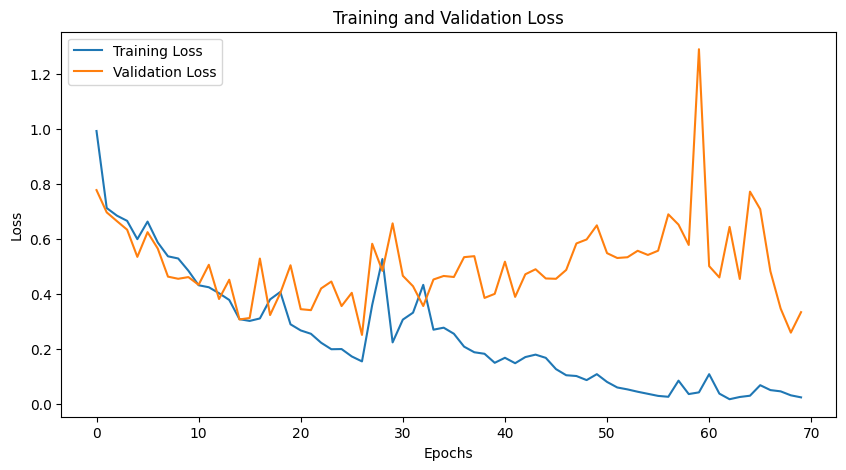

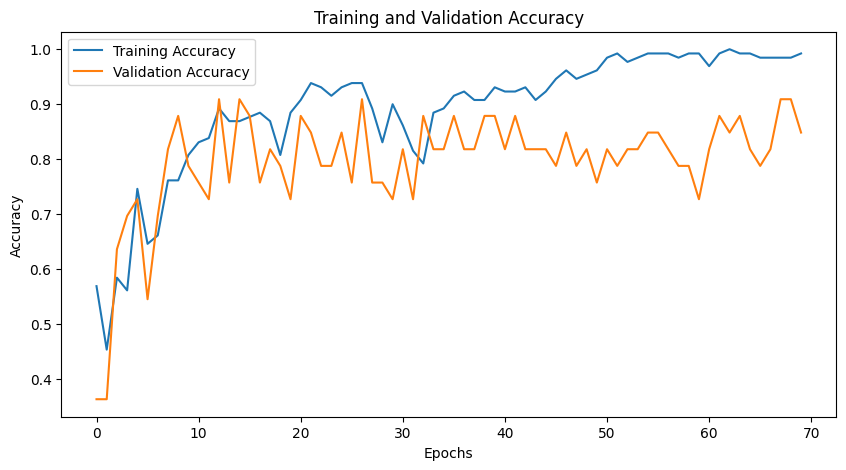

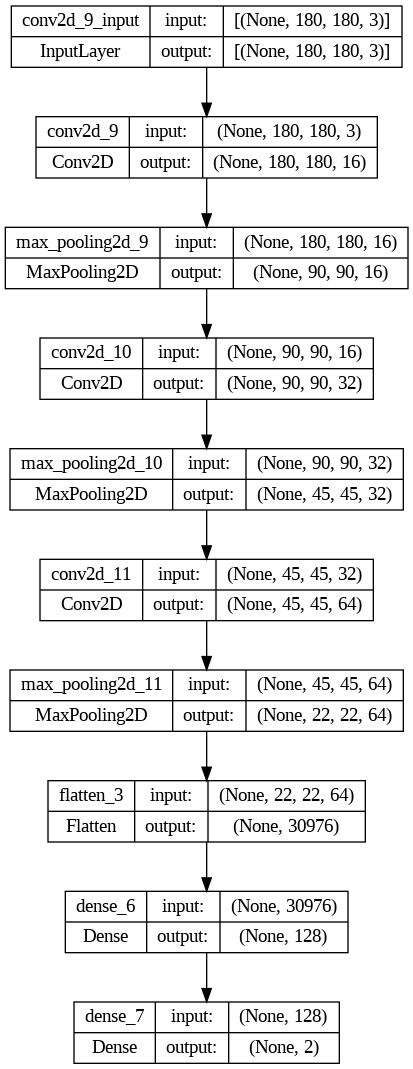

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

2/2 [==============================] - 0s 11ms/step - loss: 0.3347 - accuracy: 0.8485


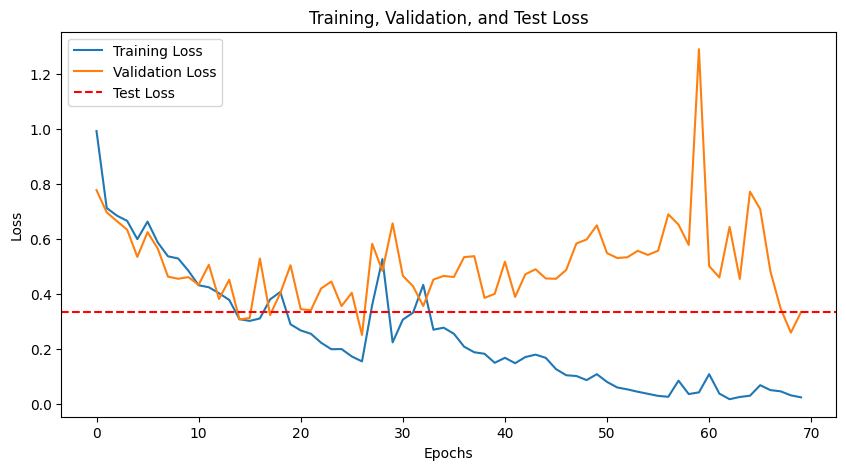

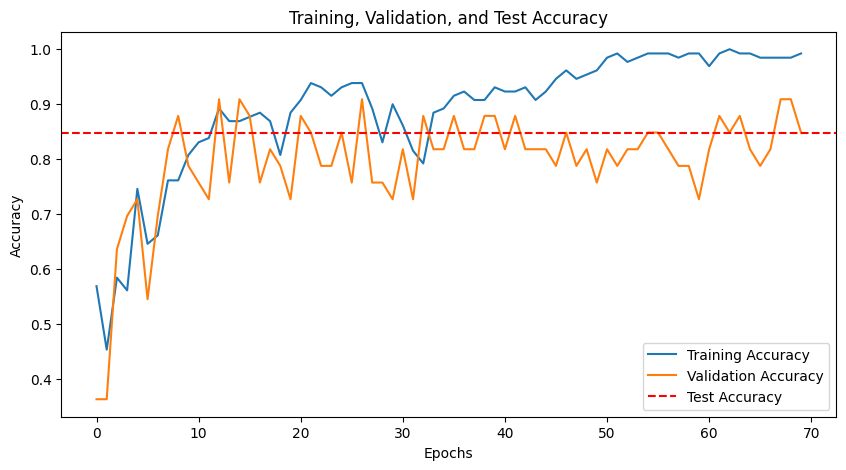

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Plot the training, validation, and testing loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training, validation, and testing accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 84.85 % Accuracy has been obtained for the CNN model trained for predicting Dry & Healthy Skin on test data

2/2 [==============================] - 0s 12ms/step


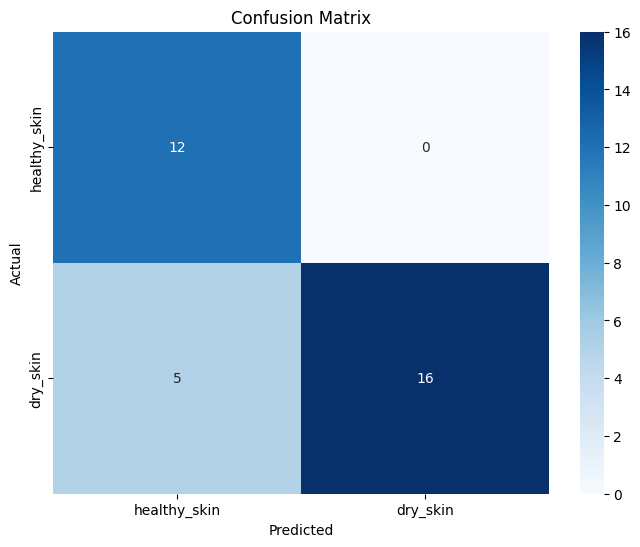

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dry_skin_vitamin_b7_iron_deficiency_labels_dict.keys(),
            yticklabels=dry_skin_vitamin_b7_iron_deficiency_labels_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predictions for the entire test dataset, showing the the confidence score (possibilities) of every sample / image of the test dataset belonging to the 2 different classes that we have in our Dry & Healthy Skin dataset.

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

2/2 [==============================] - 0s 7ms/step


array([[ -0.30815667,  -0.9936894 ],
       [-13.255802  ,  -2.9180255 ],
       [-12.409069  ,   1.421085  ],
       [  7.9755983 , -11.580474  ],
       [ -6.5098696 ,  -0.17380908],
       [  2.7523158 ,  -1.6615214 ],
       [ -9.365262  ,  -5.02635   ],
       [  3.188445  ,  -8.127158  ],
       [  1.0361773 ,  -1.5957249 ],
       [-12.063597  ,   0.1580506 ],
       [ -1.5837125 ,  -0.21253496],
       [-10.246802  ,   2.1711287 ],
       [ -0.04134732,  -2.297653  ],
       [ -6.269598  ,  -4.7540817 ],
       [  2.8592286 ,  -1.489956  ],
       [ -3.2989187 ,   0.5864482 ],
       [  4.6049924 ,  -7.9052153 ],
       [ -3.8133767 ,  -1.1866965 ],
       [-14.22712   ,  -1.1398282 ],
       [ -7.1298857 ,  -1.7246993 ],
       [  3.1293805 ,  -1.5837154 ],
       [ -0.55221945,  -3.8611476 ],
       [  1.2997586 ,  -2.3168006 ],
       [  4.922019  ,  -1.3663899 ],
       [ -3.474322  ,  -2.4897707 ],
       [  1.8935803 ,  -0.75052625],
       [ -2.5577195 ,  -3.4617553 ],
 

# Checking the class of the 10th sample in the test dataset

# Converting the scores of the predictions for the tenth sample of the test dataset into probability scores using softmax

In [ ]:
score = tf.nn.softmax(predictions[9])
score

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.922706e-06, 9.999951e-01], dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[9]

1

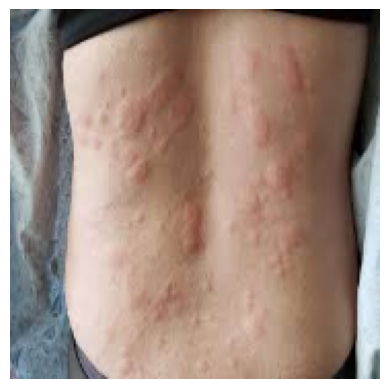

In [ ]:
# Displaying the BGR image using Matplotlib
plt.imshow(X_test_scaled[9][:, :, ::-1])  # Reversing the order (BGR to RGB) for display
plt.axis('off')  # Turning off axis labels and ticks
plt.show()

# The skin in this above image is dry skin, so the prediction made for 10th image which was class index 1 (dry skin) in the test dataset is correct

# Number of images & labels in the test dataset (X_test_scaled (test image) & y_test (test image label))

In [ ]:
X_test_scaled.shape

(33, 180, 180, 3)

In [ ]:
y_test.shape

(33,)

### The test dataset contains 33 images numbered with numbers from 0 to 32

In [ ]:
input_test_image = int(input("Enter a number between 0 and 33 (excluding 33), this number represents which sample image you want to pick from the test dataset : "))

Enter a number between 0 and 33 (excluding 33), this number represents which sample image you want to pick from the test dataset : 17


Predicted Index: 1
Actual Index: 1
Predicted Class Name: dry_skin


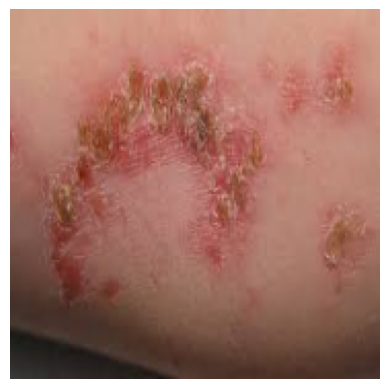

In [ ]:
# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = y_test[input_test_image]

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in dry_skin_vitamin_b7_iron_deficiency_labels_dict.items() if index == predicted_index][0]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in dry_skin_vitamin_b7_iron_deficiency_labels_dict.items() if index == actual_index][0]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")

# Display the BGR image using Matplotlib
plt.imshow(X_test_scaled[input_test_image][:, :, ::-1])  # Reverse the order (BGR to RGB) for display
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


# As we can see in the above generated output the image at index 15 (which means the 16th image in the test dataset) is a dry skin image & it's actual & predicted class index are the same which is 1 (which means dry skin class), so the prediction made by the created CNN model is correct

# Saving the created CNN model for which we obtained 84.85 % accuracy on test data

In [ ]:
# Define the path to your desired folder in Google Drive
save_model_folder = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/CNN_Models/dry_healthy_skin_CNN_model/'

In [ ]:
# Save the model
model.save(save_model_folder + 'dry_healthy_skin_classification_first_CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading the saved CNN model

In [ ]:
from tensorflow.keras.models import load_model

saved_model_path = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/CNN_Models/dry_healthy_skin_CNN_model/dry_healthy_skin_classification_first_CNN_model.h5"

# Load the model
loaded_model = load_model(saved_model_path)


# Using the saved model after loading it to make predictions on unseen image

# Downloading an image from google to test the model

In [ ]:
!pip install requests

In [ ]:
import requests
from google.colab import drive

# URL of the image to download
image_url = 'https://stylesatlife.com/wp-content/uploads/2018/04/Easier-Ways-To-Better-Your-Baby%E2%80%99s-Complexion-And-Glow.jpg'

# Define the path to your desired folder in Google Drive
image_path = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/'

# Send a GET request to download the image
response = requests.get(image_url)

# Save the image to your Google Drive folder
with open(image_path + 'healthy_skin_baby_image.jpg', 'wb') as f:
    f.write(response.content)


# Use the loaded model to predict the class of the image downloaded from the internet

In [ ]:
# Load and preprocess the new image
unseen_test_image_path = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/healthy_skin_baby_image.jpg"
new_image = tf.keras.preprocessing.image.load_img(unseen_test_image_path, target_size=(180, 180))
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_scaled = new_image_array / 255.0

# Make predictions using the loaded model
predictions = loaded_model.predict(new_image_scaled)

# Convert predictions to class labels using argmax
predicted_class = np.argmax(predictions)

# Display the predicted class
for class_name, class_label in dry_skin_vitamin_b7_iron_deficiency_labels_dict.items():
    if class_label == predicted_class:
        print(f"Predicted Class: {class_name}")

1/1 [==============================] - 0s 18ms/step
Predicted Class: healthy_skin


### Getting correct prediction for the unseen healthy skin image that was downloaded from the internet with the created CNN model, The image was of a baby with healthy skin and the prediction obtained is also healthy_skin

# Displaying the downloaded image for which the class was predicted using the created CNN model

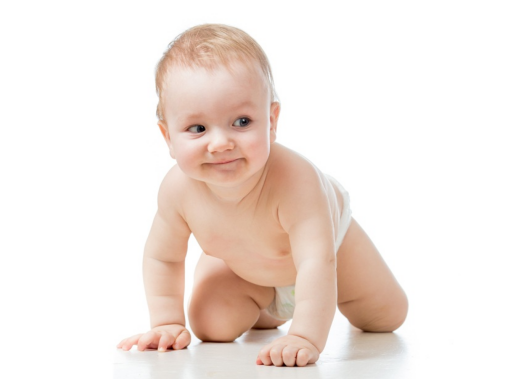

In [ ]:
import matplotlib.image as mpimg

# Providing the path of the downloaded image file stored in Google Drive
image_path = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/healthy_skin_baby_image.jpg'  # Replace with your image path

# Reading the image using Matplotlib
img = mpimg.imread(image_path)

# Displaying the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# As we can see the image that was downloaded is of a baby with healthy skin & the prediction obtained for this image using our CNN Model is also healthy_skin, This demonstrates the effectiveness of the created CNN model in distinguishing between dry & healthy skin

<hr>
<hr>

In [ ]:
img_height = 180
img_width = 180

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 2

model = Sequential([
  data_augmentation, # the first layer is augmentation which produces new samples
  # usually we put multiple convolutional & maxpooling layers first
  layers.Conv2D(16, 3, padding='same', activation='relu'), # 16 filters of size 3*3, the activation function we use usually is relu
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), # 32 filters of size 3*3
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), # 64 filters of size 3*3
  layers.MaxPooling2D(),
  # till this point we will have a 2D array
  # Before the dense layer we should always flatten the input that would go into the Dense layer
  layers.Dropout(0.2), # The dropout layer would drop 20 % of the neurons at random from every layer in each pass, giving us better generalisation so that we can avoid overfitting
  layers.Flatten(), # converts the 2D array into 1D array
  # We always put a dense layer after adding all the convolutional layers
  # The dense layer only accepts a 1D array
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) # there would be 4 neurons in the last layer so if the first neuron is activated we would know that the predicted class is 'marigold_fresh' & similarly the activation of the other 3 neurons would indicate the class being 'marigold_decayed', 'hibiscus_fresh', 'hibiscus_decayed'
  # the number of neurons in the last layer which is a dense layer is always equal to the number of classes & the activation of different neurons from the last layer indicate different classes for the input provided
  # activation function being used here is linear, we can even use some other function
  # We can use the softmax function as the activation function for this last Dense layer which gives the predictions / outputs
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # SparseCategoricalCrossentropy is being used as the final vector indicates a category / class to which the input belongs & it is not a one hot encoded value

history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_test_scaled, y_test))

Epoch 1/200
5/5 [==============================] - 8s 192ms/step - loss: 0.8698 - accuracy: 0.5615 - val_loss: 0.7322 - val_accuracy: 0.4545
Epoch 2/200
5/5 [==============================] - 0s 32ms/step - loss: 0.6705 - accuracy: 0.5615 - val_loss: 0.5665 - val_accuracy: 0.6364
Epoch 3/200
5/5 [==============================] - 0s 36ms/step - loss: 0.6065 - accuracy: 0.5462 - val_loss: 0.5589 - val_accuracy: 0.7879
Epoch 4/200
5/5 [==============================] - 0s 33ms/step - loss: 0.5804 - accuracy: 0.7538 - val_loss: 0.5149 - val_accuracy: 0.6364
Epoch 5/200
5/5 [==============================] - 0s 33ms/step - loss: 0.5846 - accuracy: 0.6308 - val_loss: 0.5213 - val_accuracy: 0.7273
Epoch 6/200
5/5 [==============================] - 0s 33ms/step - loss: 0.5615 - accuracy: 0.7923 - val_loss: 0.5287 - val_accuracy: 0.8182
Epoch 7/200
5/5 [==============================] - 0s 32ms/step - loss: 0.5697 - accuracy: 0.7692 - val_loss: 0.4602 - val_accuracy: 0.7576
Epoch 8/200
5/5 [==

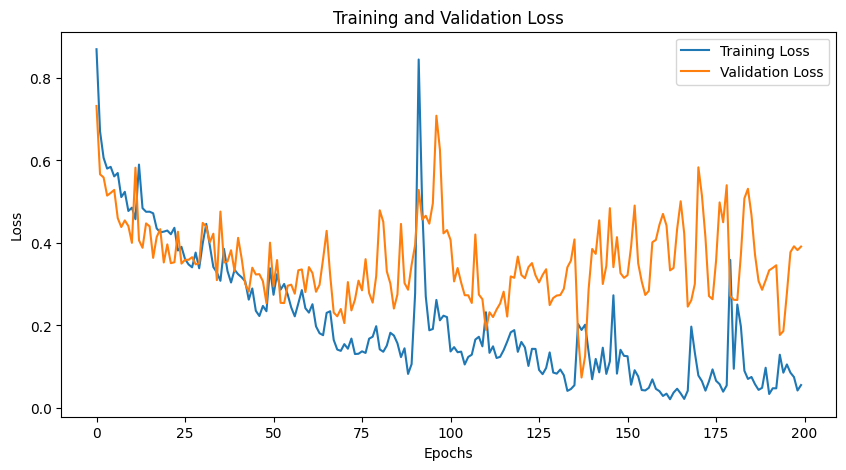

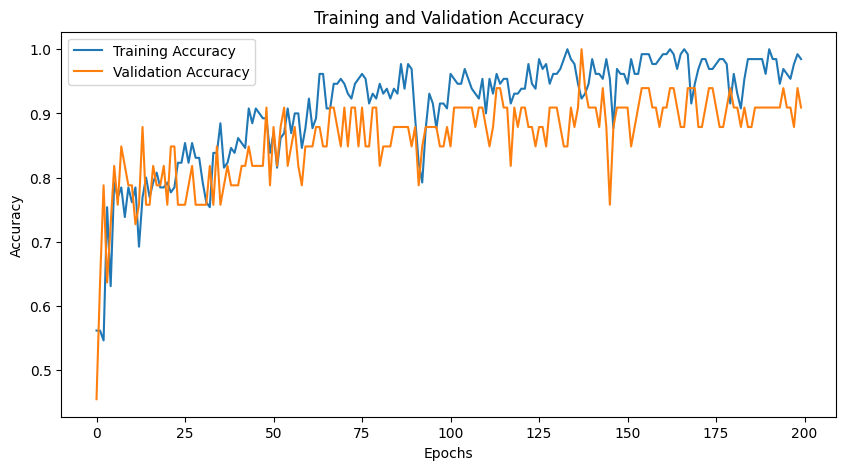

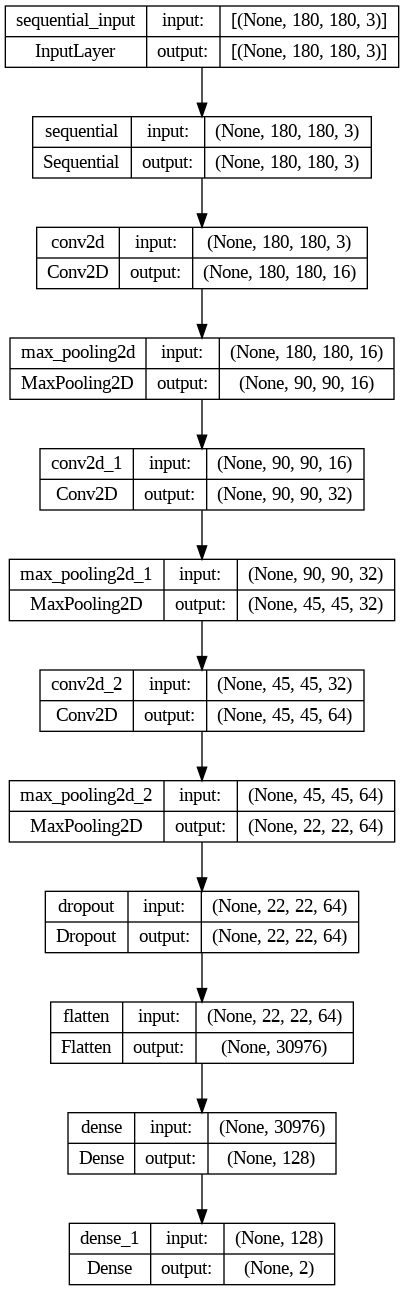

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

2/2 [==============================] - 0s 8ms/step - loss: 0.3913 - accuracy: 0.9091


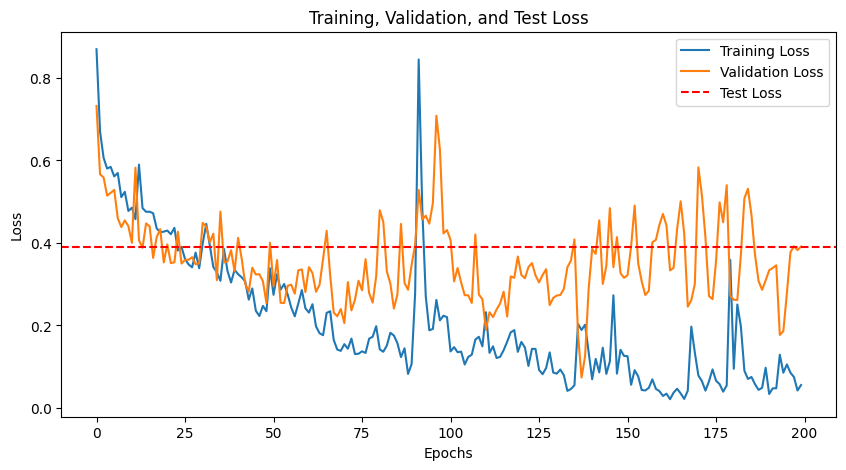

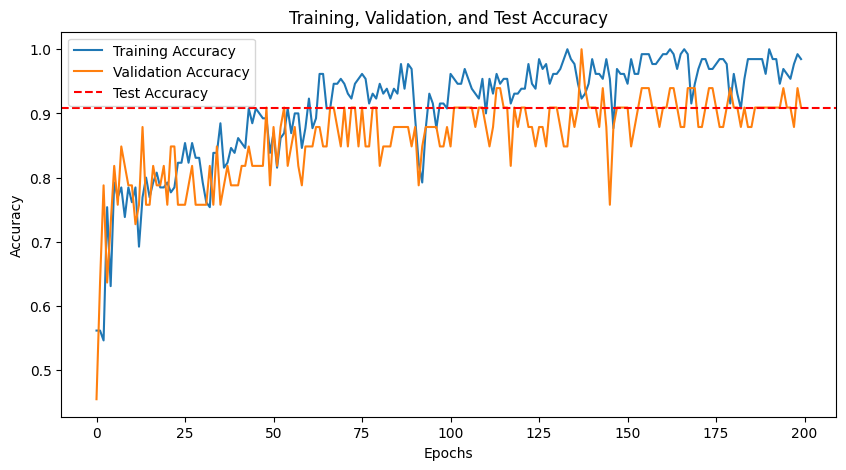

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Plot the training, validation, and testing loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training, validation, and testing accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2/2 [==============================] - 0s 7ms/step


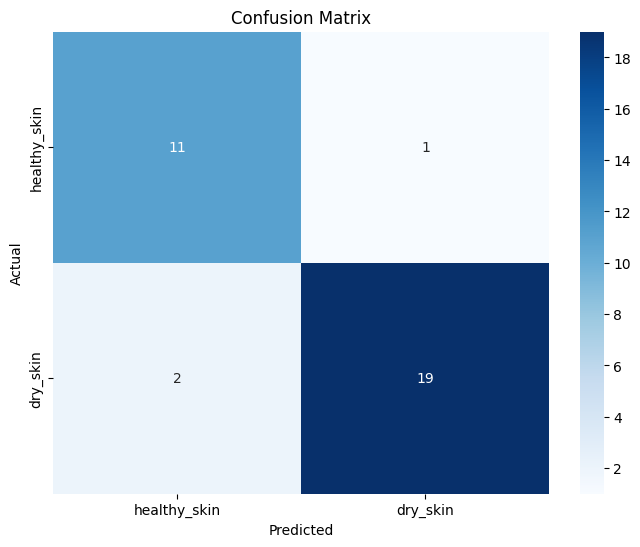

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dry_skin_vitamin_b7_iron_deficiency_labels_dict.keys(),
            yticklabels=dry_skin_vitamin_b7_iron_deficiency_labels_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define the path to your desired folder in Google Drive
save_model_folder = '/content/drive/MyDrive/created_machine_learning_models/'

In [ ]:
# Save the model
model.save(save_model_folder + 'dry_healthy_skin_classification_enhanced_CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

saved_model_path = "/content/drive/MyDrive/created_machine_learning_models/dry_healthy_skin_classification_enhanced_CNN_model.h5"

# Load the model
loaded_model = load_model(saved_model_path)


In [ ]:
# Load and preprocess the new image
unseen_test_image_path = "/content/drive/MyDrive/Datasets/healthy_skin_baby_image.jpg"
new_image = tf.keras.preprocessing.image.load_img(unseen_test_image_path, target_size=(180, 180))
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_scaled = new_image_array / 255.0

# Make predictions using the loaded model
predictions = loaded_model.predict(new_image_scaled)

# Convert predictions to class labels using argmax
predicted_class = np.argmax(predictions)

# Display the predicted class
for class_name, class_label in dry_skin_vitamin_b7_iron_deficiency_labels_dict.items():
    if class_label == predicted_class:
        print(f"Predicted Class: {class_name}")

1/1 [==============================] - 0s 45ms/step
Predicted Class: healthy_skin


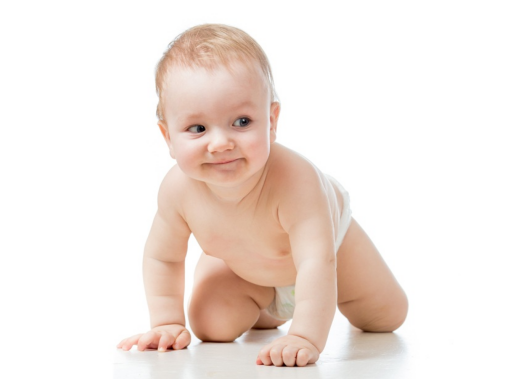

Predicted Class: healthy_skin


In [ ]:
import matplotlib.image as mpimg

# Providing the path of the downloaded image file stored in Google Drive
image_path = '/content/drive/MyDrive/Datasets/healthy_skin_baby_image.jpg'  # Replace with your image path

# Reading the image using Matplotlib
img = mpimg.imread(image_path)

# Displaying the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Display the predicted class
for class_name, class_label in dry_skin_vitamin_b7_iron_deficiency_labels_dict.items():
    if class_label == predicted_class:
        print(f"Predicted Class: {class_name}")
